In [8]:
import pandas as pd
from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (14, 8)

plt.subplots_adjust(top=0.9)

loaded = defaultdict(list)
squished = []
folder = "./glad-prop-sweep_defc_vs_coop/"
num_files = 20

file_base_labels = {
    #"glad-mixed-sweep": "mixed grid",
    "glad-standard-sweep": "standard grid"
}

file_labels = dict()

for key in file_base_labels:
    for i in range(1, 10):
        file_labels[key + "-" + str(i)] = file_base_labels[key] + " " + str(i) + "0 %"


for i in range(num_files):
    for key in file_labels:
        moo = pd.read_csv("{}{}-{}-quorum.csv".format(folder, key, i), skipinitialspace=True)
        moo['replicant'] = "{0}".format(i)
        
        #moo.set_index(["update"])
        loaded[key].append(moo)

for key in file_labels:
    squash = pd.concat(loaded[key], axis=0)
    squash["config"] = file_labels[key]
    #print("Key {} and value{}".format(key, file_labels[key]))
    squished.append(squash)
    
super_squished_standard = pd.concat(squished)
super_squished_standard = super_squished_standard[super_squished_standard['update'] <= 1000]
#super_squished = pd.concat([squished_coop, squished_balanced])


file_base_labels = {
    "glad-mixed-sweep": "mixed grid",
}

file_labels = dict()
loaded = defaultdict(list)
squished = []

for key in file_base_labels:
    for i in range(1, 10):
        file_labels[key + "-" + str(i)] = file_base_labels[key] + " " + str(i) + "0 %"
        
num_files = 20
for i in range(num_files):
    for key in file_labels:
        moo = pd.read_csv("{}{}-{}-quorum.csv".format(folder, key, i), skipinitialspace=True)
        moo['replicant'] = "{0}".format(i)
        
        #moo.set_index(["update"])
        loaded[key].append(moo)

for key in file_labels:
    squash = pd.concat(loaded[key], axis=0)
    squash["config"] = file_labels[key]
    #print("Key {} and value{}".format(key, file_labels[key]))
    squished.append(squash)

super_squished_mixed = pd.concat(squished)
super_squished_mixed = super_squished_mixed[super_squished_mixed['update'] <= 1000]
super_squished_mixed

Populating the interactive namespace from numpy and matplotlib


,update,avg_age,max_age,avg_coop,avg_points,percent_defector,donator,grid_usage,replicant,config
0,0,0.00000,0,0.730000,0.00000,0.270000,0.730000,0.166667,0,mixed grid 30 %
1,10,10.00000,10,0.730000,10.00000,0.270000,0.730000,0.166667,0,mixed grid 30 %
2,20,20.00000,20,0.730000,20.00000,0.270000,0.730000,0.166667,0,mixed grid 30 %
3,30,8.01921,30,0.813234,9.69797,0.186766,0.813234,0.260278,0,mixed grid 30 %
4,40,10.89430,40,0.825764,16.71840,0.174236,0.825764,0.336389,0,mixed grid 30 %
5,50,5.00749,50,0.803794,16.08440,0.196206,0.803794,0.556389,0,mixed grid 30 %
6,60,4.11814,35,0.650492,20.28970,0.349508,0.650492,0.790000,0,mixed grid 30 %
7,70,5.56704,45,0.384615,18.33510,0.615385,0.384615,0.913611,0,mixed grid 30 %
8,80,9.35296,55,0.264497,17.70150,0.735503,0.264497,0.938889,0,mixed grid 30 %
9,90,13.93870,65,0.208285,19.72140,0.791715,0.208285,0.952222,0,mixed grid 30 %


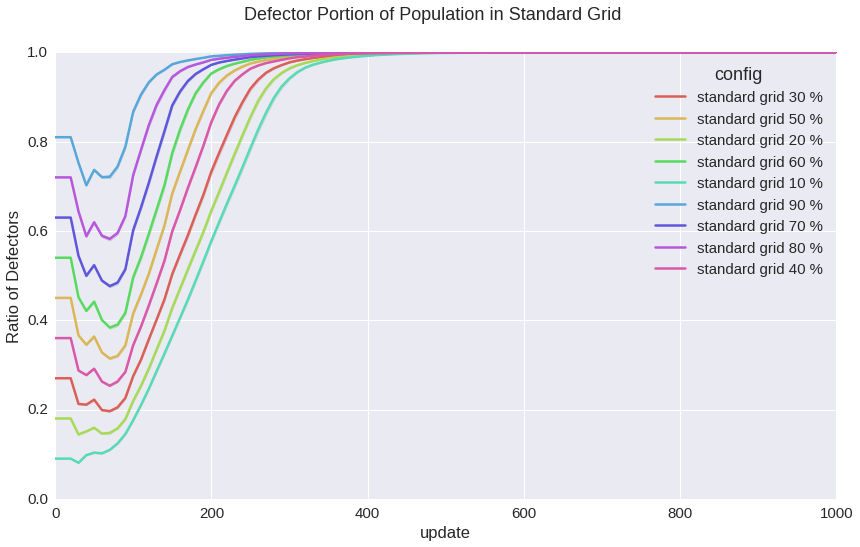

In [9]:

sns.plt.suptitle("Defector Portion of Population in Standard Grid")
ax = sns.tsplot( time="update", value="percent_defector", unit="replicant", 
           condition="config", data=super_squished_standard, color="hls")
ax.set(ylabel="Ratio of Defectors")

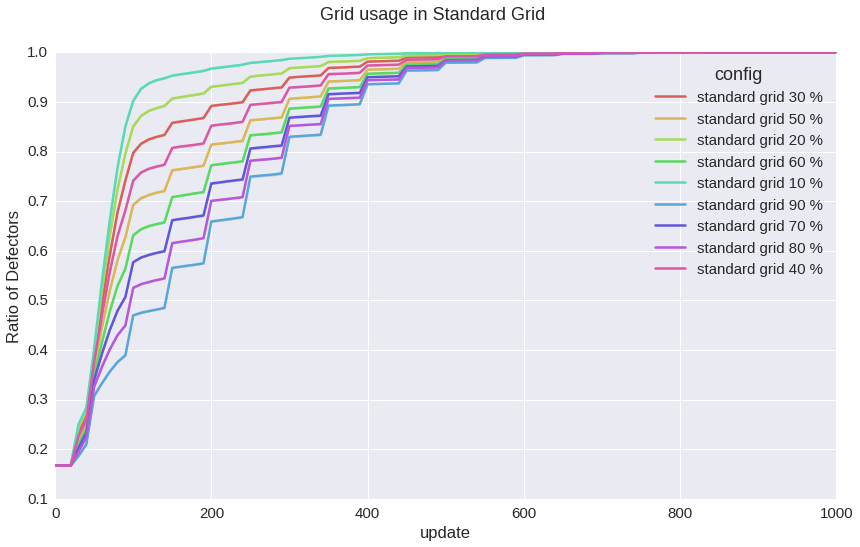

In [12]:

sns.plt.suptitle("Grid usage in Standard Grid")
ax = sns.tsplot( time="update", value="grid_usage", unit="replicant", 
           condition="config", data=super_squished_standard, color="hls")
ax.set(ylabel="Ratio of Defectors")

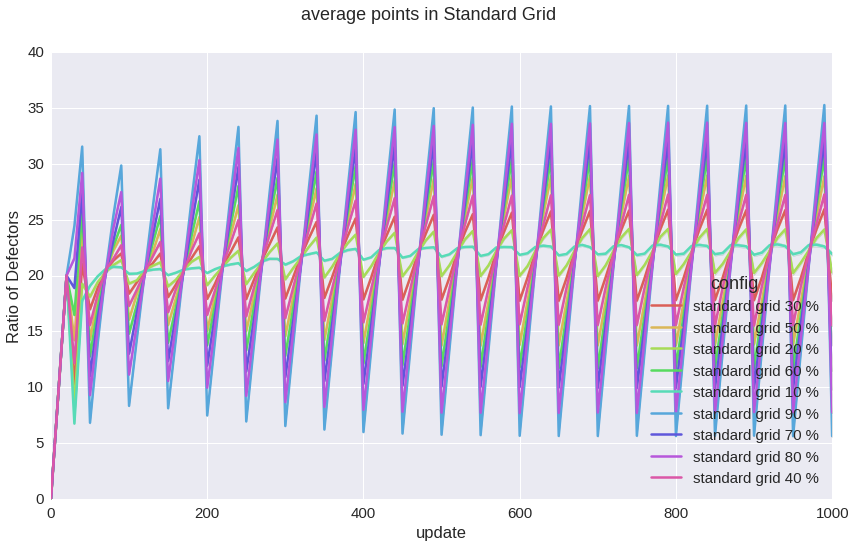

In [10]:
sns.plt.suptitle("average points in Standard Grid")
ax = sns.tsplot( time="update", value="avg_points", unit="replicant", 
           condition="config", data=super_squished_standard, color="hls")
ax.set(ylabel="Ratio of Defectors")

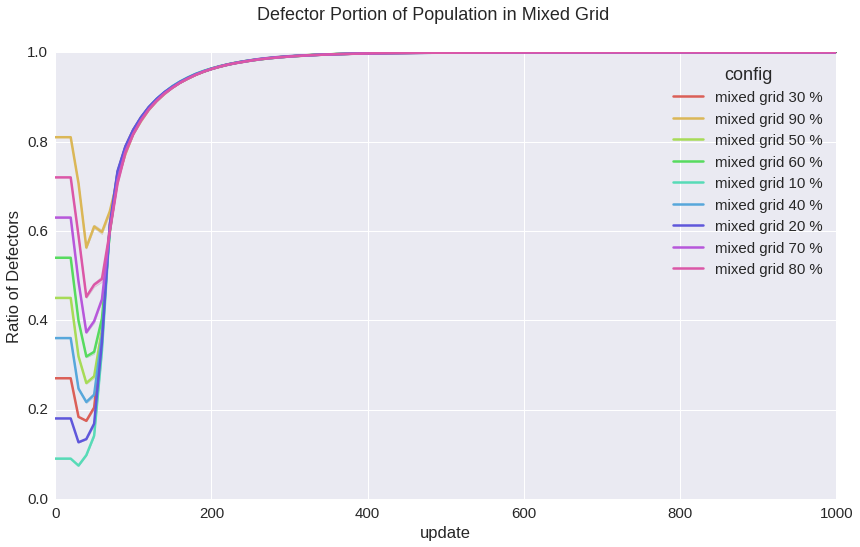

In [11]:
sns.plt.suptitle("Defector Portion of Population in Mixed Grid")
ax = sns.tsplot( time="update", value="percent_defector", unit="replicant", 
           condition="config", data=super_squished_mixed, color="hls")
ax.set(ylabel="Ratio of Defectors")

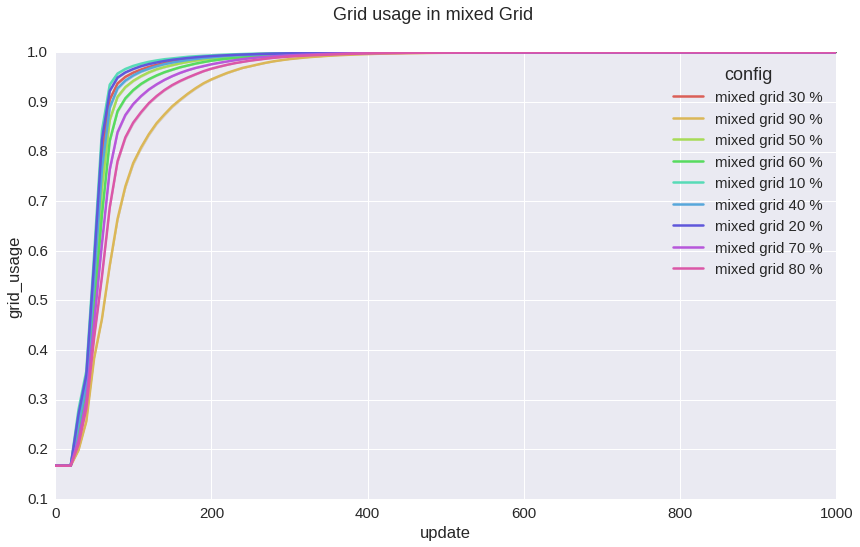

In [14]:

sns.plt.suptitle("Grid usage in mixed Grid")
ax = sns.tsplot( time="update", value="grid_usage", unit="replicant", 
           condition="config", data=super_squished_mixed, color="hls")